In [1]:
# Level 1

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.tokenize import wordpunct_tokenize, sent_tokenize
import sys
import string
import re
import numpy as np
from decimal import Decimal, ROUND_HALF_UP
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.feature_extraction.text as fe_text
import scipy.spatial.distance as distance

In [3]:
def preprocess_docs(docs):
    '''英文書集合 docs に対し前処理を施し、分かち書きしたリストのリストとして返す。

    :param docs(list): 1文書1文字列で保存。複数文書をリストとして並べたもの。
    :return (list): 文分割、単語分割、基本形、ストップワード除去した結果。
    '''
    stopwords = nltk.corpus.stopwords.words('english')
    for punct in string.punctuation:
        stopwords.append(punct)

    result = []
    wnl = nltk.stem.wordnet.WordNetLemmatizer()
    for doc in docs:
        for sent in sent_tokenize(doc):
            for word in wordpunct_tokenize(sent):
                this_word = wnl.lemmatize(word.lower())
                if (this_word not in stopwords) and (re.search("[a-zA-Z]+", this_word) is not None) and (this_word not in result):
                    result.append(this_word)
    return result


In [4]:
def make_vectors_eng(docs, codebook):
    '''コードブックを素性とする文書ベクトルを作る（直接ベクトル生成）

    :param docs(list): 1文書1文字列で保存。複数文書をリストとして並べたもの。
    :param codebook(list): ユニークな単語一覧。
    :return (list): コードブックを元に、出現回数を特徴量とするベクトルを返す。
    '''
    vectors = []
    wnl = nltk.stem.wordnet.WordNetLemmatizer()
    for doc in docs:
        this_vector = []
        fdist = nltk.FreqDist()
        for sent in sent_tokenize(doc):
            for word in wordpunct_tokenize(sent):
                this_word = wnl.lemmatize(word.lower())
                fdist[this_word] += 1
        for word in codebook:
            this_vector.append(fdist[word])
        vectors.append(this_vector)
    return vectors

In [5]:
def cos_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [6]:
docs = []
files = []
for i in range(13):
    fname = f"./data/ch{i:02}.html.txt"
    print(fname)
    files.append(fname)
for fname in files:
    with open(fname, 'r') as f:
            docs.append(f.read())
wordlist = preprocess_docs(docs)
#print(wordlist)

./data/ch00.html.txt
./data/ch01.html.txt
./data/ch02.html.txt
./data/ch03.html.txt
./data/ch04.html.txt
./data/ch05.html.txt
./data/ch06.html.txt
./data/ch07.html.txt
./data/ch08.html.txt
./data/ch09.html.txt
./data/ch10.html.txt
./data/ch11.html.txt
./data/ch12.html.txt


In [7]:
#docs

In [8]:
vectors = make_vectors_eng(docs, wordlist)
# for index in range(len(docs)):
#     print('vectors[{}] = {}'.format(index,vectors[index]))
#     print('----')

In [9]:
similarities = []
for vec1 in vectors:
    temp = []
    for vec2 in vectors:
        temp.append(cos_similarity(vec1, vec2))
    similarities.append(temp)

# print('# cosine_similarity')
# for index in range(len(similarities)):
#     print(similarities[index])

In [10]:
df = pd.DataFrame(similarities)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,0.496769,0.378760,0.401470,0.456015,0.290184,0.252161,0.259787,0.243099,0.162252,0.184869,0.457201,0.697140
1,0.496769,1.000000,0.696415,0.757016,0.738068,0.540016,0.391329,0.315830,0.316553,0.166074,0.219222,0.449039,0.350806
2,0.378760,0.696415,1.000000,0.664770,0.640270,0.590080,0.382584,0.341742,0.326749,0.202706,0.175393,0.538284,0.298384
3,0.401470,0.757016,0.664770,1.000000,0.678346,0.513358,0.330983,0.352491,0.310565,0.191403,0.234013,0.491367,0.289900
4,0.456015,0.738068,0.640270,0.678346,1.000000,0.515585,0.375796,0.322434,0.324925,0.254193,0.265928,0.456596,0.289911
5,0.290184,0.540016,0.590080,0.513358,0.515585,1.000000,0.395662,0.540631,0.320505,0.230925,0.193559,0.411290,0.256783
6,0.252161,0.391329,0.382584,0.330983,0.375796,0.395662,1.000000,0.329011,0.258077,0.341695,0.201714,0.319037,0.259643
7,0.259787,0.315830,0.341742,0.352491,0.322434,0.540631,0.329011,1.000000,0.516308,0.302536,0.239917,0.360837,0.237686
8,0.243099,0.316553,0.326749,0.310565,0.324925,0.320505,0.258077,0.516308,1.000000,0.446408,0.273567,0.328014,0.253818
9,0.162252,0.166074,0.202706,0.191403,0.254193,0.230925,0.341695,0.302536,0.446408,1.000000,0.265981,0.205453,0.168700


Text(0.5, 51.0, 'Number of chapter')

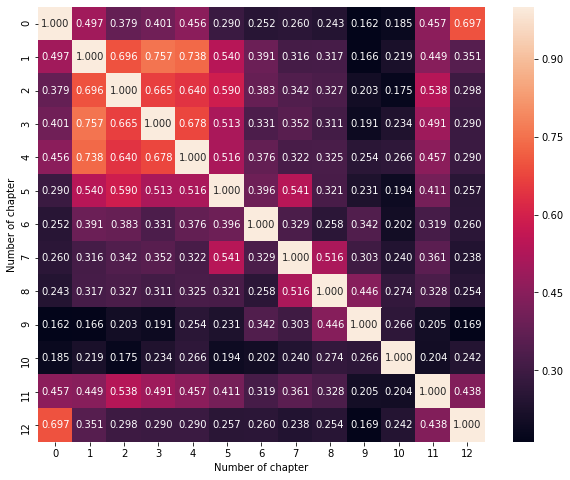

In [11]:
plt.subplots(figsize=(10,8))
sns.heatmap(df, annot=True, fmt='.3f')
plt.ylabel("Number of chapter")
plt.xlabel("Number of chapter")

In [12]:
print(len(vectors[1]), len(wordlist))
count = []
for num in range(len(wordlist)):
    temp = 0
    for i in range(len(vectors)):
        temp += vectors[i][num]
    count.append(temp)
    
index = 0
bigger_than_400 = []
for i in range(len(count)):
    if count[i] > 400:
        print(f"index = {index}, count = {count[i]}")
        bigger_than_400.append(index)
    index += 1

8962 8962
index = 3, count = 467
index = 40, count = 1605
index = 61, count = 551
index = 66, count = 770
index = 116, count = 603
index = 125, count = 471
index = 132, count = 776
index = 212, count = 494
index = 219, count = 468
index = 223, count = 530
index = 248, count = 424
index = 375, count = 496
index = 393, count = 463
index = 560, count = 442
index = 694, count = 431
index = 695, count = 592
index = 1421, count = 500
index = 2460, count = 609


In [13]:
vec1_3_9 = []
for ch in [1, 3, 9]:
    temp = []
    for i in bigger_than_400:
        temp.append(vectors[ch][i])
    vec1_3_9.append(temp)

print(vec1_3_9)

[[57, 228, 39, 133, 11, 115, 31, 71, 46, 4, 11, 26, 37, 34, 0, 7, 1, 4], [27, 262, 53, 201, 55, 90, 82, 72, 86, 2, 23, 25, 84, 31, 2, 54, 1, 11], [5, 10, 43, 1, 0, 4, 43, 6, 17, 174, 92, 13, 22, 2, 4, 119, 107, 37]]


In [14]:
vec1_3_4 = []
for ch in [1, 3, 4]:
    temp = []
    for i in bigger_than_400:
        temp.append(vectors[ch][i])
    vec1_3_4.append(temp)

print(vec1_3_4)

[[57, 228, 39, 133, 11, 115, 31, 71, 46, 4, 11, 26, 37, 34, 0, 7, 1, 4], [27, 262, 53, 201, 55, 90, 82, 72, 86, 2, 23, 25, 84, 31, 2, 54, 1, 11], [29, 205, 62, 78, 29, 125, 49, 153, 56, 8, 78, 9, 79, 216, 18, 92, 0, 9]]


<BarContainer object of 18 artists>

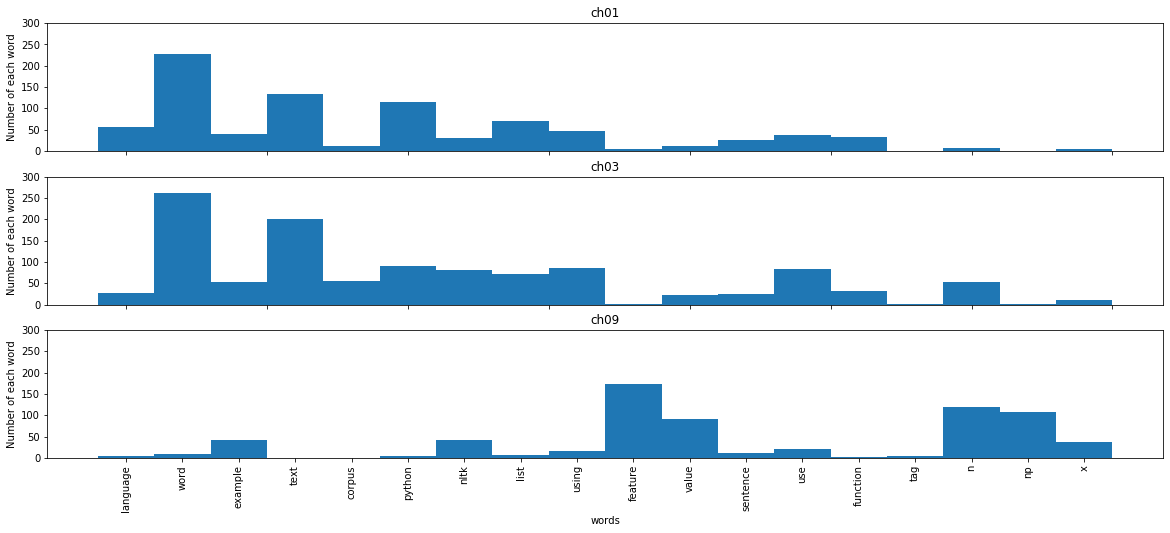

In [15]:
labels = []
for i in bigger_than_400:
    labels.append(wordlist[i])

x = list(range(len(bigger_than_400)))
plt.subplots(figsize=(20,8))
plt.subplot(3,1,1, title="ch01", ylabel="Number of each word")
plt.xticks(visible=False)
plt.ylim(top=300)
plt.bar(x, vec1_3_9[0], width=1.0)
plt.subplot(3,1,2, title="ch03", ylabel="Number of each word")
plt.xticks(visible=False)
plt.ylim(top=300)
plt.bar(x, vec1_3_9[1], width=1.0)
plt.subplot(3,1,3, xticklabels=labels, title="ch09", xlabel="words", ylabel="Number of each word")
plt.xticks(x, rotation=90)
plt.ylim(top=300)
plt.bar(x, vec1_3_9[2], width=1.0)

<BarContainer object of 18 artists>

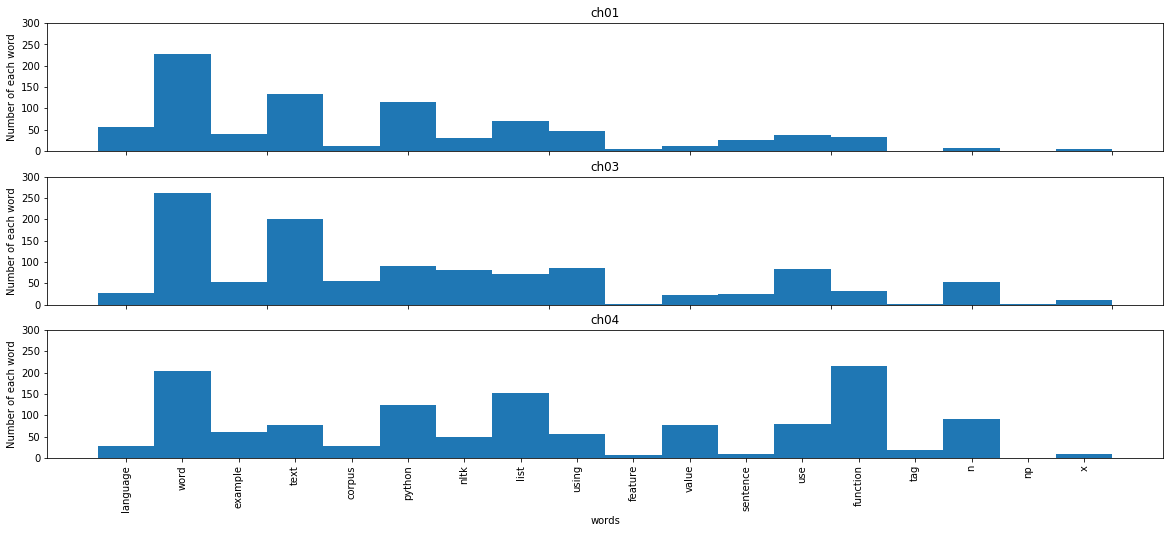

In [16]:
labels = []
for i in bigger_than_400:
    labels.append(wordlist[i])

x = list(range(len(bigger_than_400)))
plt.subplots(figsize=(20,8))
plt.subplot(3,1,1, title="ch01", ylabel="Number of each word")
plt.xticks(visible=False)
plt.ylim(top=300)
plt.bar(x, vec1_3_4[0], width=1.0)
plt.subplot(3,1,2, title="ch03", ylabel="Number of each word")
plt.xticks(visible=False)
plt.ylim(top=300)
plt.bar(x, vec1_3_4[1], width=1.0)
plt.subplot(3,1,3, xticklabels=labels, title="ch04", xlabel="words", ylabel="Number of each word")
plt.xticks(x, rotation=90)
plt.ylim(top=300)
plt.bar(x, vec1_3_4[2], width=1.0)

In [17]:
# Level 2

In [18]:
def bow_tfidf(docs):
    '''Bag-of-WordsにTF-IDFで重み調整したベクトルを生成。

    :param docs(list): 1文書1文字列で保存。複数文書をリストとして並べたもの。
    :return: 重み調整したベクトル。
    '''
    my_stopwords = []
    for punct in string.punctuation:
        my_stopwords.append(punct)
    stopwords = fe_text.ENGLISH_STOP_WORDS.union(my_stopwords)
    vectorizer = fe_text.TfidfVectorizer(norm=None, stop_words=stopwords)
    vectors = vectorizer.fit_transform(docs)
    return vectors.toarray(), vectorizer

In [19]:
vectors_ex2, vectorizer = bow_tfidf(docs)
print('# BoW + tfidf')
#print(vectorizer.get_feature_names())
#print(vectors_ex2)

# BoW + tfidf


In [20]:
similarities = []
for vec1 in vectors_ex2:
    temp = []
    for vec2 in vectors_ex2:
        temp.append(cos_similarity(vec1, vec2))
    similarities.append(temp)

# print('# cosine_similarity')
# for index in range(len(similarities)):
#     print(similarities[index])

In [21]:
df = pd.DataFrame(similarities)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,0.367472,0.223271,0.290564,0.335347,0.186425,0.162985,0.133863,0.125053,0.068982,0.134872,0.255162,0.502075
1,0.367472,1.000000,0.433976,0.536659,0.548755,0.304839,0.219731,0.150622,0.161083,0.070217,0.145494,0.226845,0.230746
2,0.223271,0.433976,1.000000,0.417522,0.408735,0.315998,0.199627,0.156762,0.143136,0.064411,0.106692,0.281705,0.163761
3,0.290564,0.536659,0.417522,1.000000,0.506376,0.294280,0.184989,0.185501,0.162218,0.078407,0.145739,0.277323,0.184040
4,0.335347,0.548755,0.408735,0.506376,1.000000,0.309366,0.218684,0.168724,0.182100,0.112909,0.180262,0.267875,0.192534
5,0.186425,0.304839,0.315998,0.294280,0.309366,1.000000,0.242128,0.415263,0.159601,0.092336,0.112479,0.206717,0.149981
6,0.162985,0.219731,0.199627,0.184989,0.218684,0.242128,1.000000,0.196577,0.123383,0.113187,0.108353,0.148950,0.152006
7,0.133863,0.150622,0.156762,0.185501,0.168724,0.415263,0.196577,1.000000,0.364709,0.162918,0.151133,0.165283,0.112326
8,0.125053,0.161083,0.143136,0.162218,0.182100,0.159601,0.123383,0.364709,1.000000,0.304090,0.196679,0.151687,0.139987
9,0.068982,0.070217,0.064411,0.078407,0.112909,0.092336,0.113187,0.162918,0.304090,1.000000,0.163488,0.074019,0.071669


Text(0.5, 51.0, 'Number of chapter')

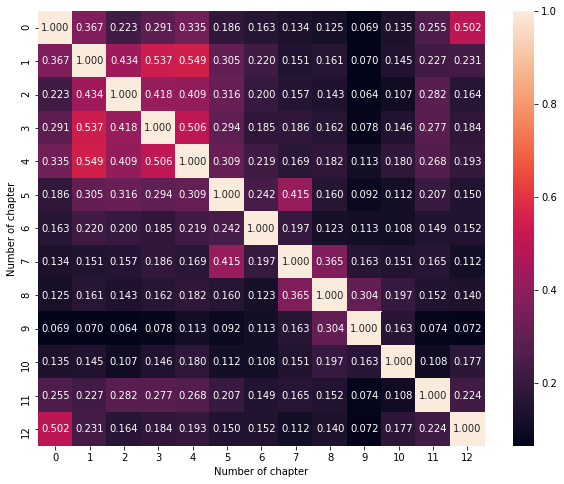

In [22]:
plt.subplots(figsize=(10,8))
sns.heatmap(df, annot=True, fmt='.3f')
plt.ylabel("Number of chapter")
plt.xlabel("Number of chapter")

In [23]:
print(len(vectors_ex2[1]), len(vectorizer.get_feature_names()))
count = []
for num in range(len(vectorizer.get_feature_names())):
    temp = 0
    for i in range(len(vectors_ex2)):
        temp += vectors_ex2[i][num]
    count.append(temp)
    
index = 0
bigger_than_400_ex2 = []
for i in range(len(count)):
    if count[i] > 400:
        print(f"index = {index}, count = {count[i]}")
        bigger_than_400_ex2.append(index)
    index += 1

10360 10360
index = 2712, count = 532.7575541882461
index = 3742, count = 426.0
index = 5722, count = 436.0878366944111
index = 6450, count = 776.0
index = 6455, count = 409.7416176955068
index = 6517, count = 754.8540413607446
index = 6541, count = 447.0460822137033
index = 7586, count = 471.0
index = 9292, count = 674.0
index = 9813, count = 463.0
index = 9829, count = 468.0
index = 10152, count = 834.0
index = 10186, count = 828.1372465305195


In [24]:
vec1_4_9 = []
for ch in [1, 4, 9]:
    temp = []
    for i in bigger_than_400_ex2:
        temp.append(vectors_ex2[ch][i])
    vec1_4_9.append(temp)

print(vec1_4_9)

[[11.815187693690941, 22.0, 56.92772252414726, 31.0, 0.0, 0.0, 0.0, 115.0, 109.0, 37.0, 46.0, 99.0, 138.5599284078301], [31.149131192457936, 53.0, 136.4117124635227, 49.0, 0.0, 0.0, 25.86217004542085, 125.0, 76.0, 79.0, 56.0, 112.0, 99.89204141029613], [0.0, 39.0, 6.444647832922332, 43.0, 0.0, 160.64042615734854, 365.76497635666635, 4.0, 1.0, 22.0, 17.0, 8.0, 2.148215944307444]]


<BarContainer object of 13 artists>

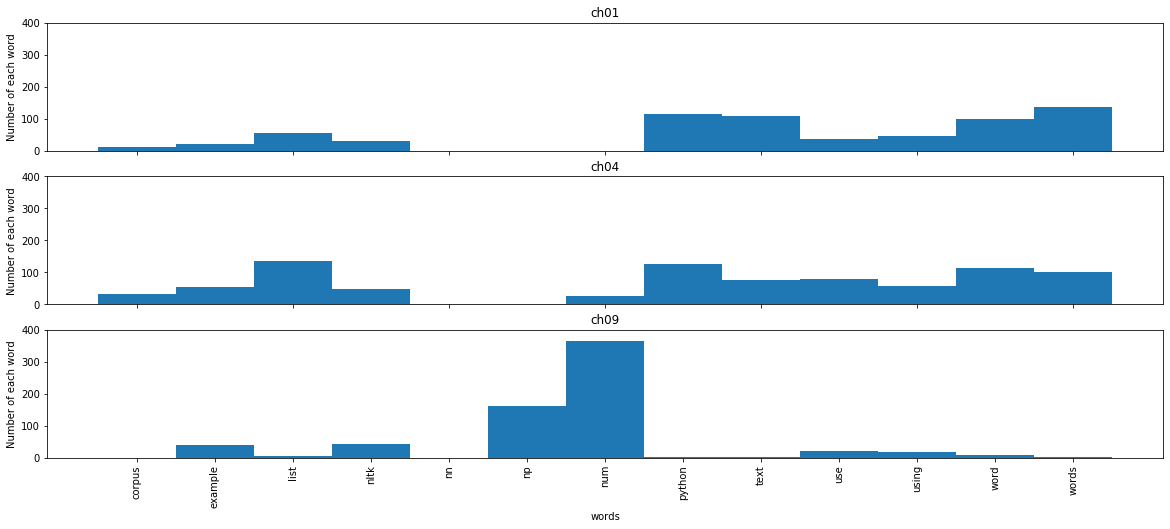

In [25]:
labels = []
for i in bigger_than_400_ex2:
    labels.append(vectorizer.get_feature_names()[i])

x = list(range(len(bigger_than_400_ex2)))
plt.subplots(figsize=(20,8))
plt.subplot(3,1,1, title="ch01", ylabel="Number of each word")
plt.xticks(visible=False)
plt.ylim(top=400)
plt.bar(x, vec1_4_9[0], width=1.0)
plt.subplot(3,1,2, title="ch04", ylabel="Number of each word")
plt.xticks(visible=False)
plt.ylim(top=400)
plt.bar(x, vec1_4_9[1], width=1.0)
plt.subplot(3,1,3, xticklabels=labels, title="ch09", xlabel="words", ylabel="Number of each word")
plt.xticks(x, rotation=90)
plt.ylim(top=400)
plt.bar(x, vec1_4_9[2], width=1.0)

In [26]:
vec1_3_4_9 = []
for ch in [1, 3, 4, 9]:
    temp = []
    for i in bigger_than_400_ex2:
        temp.append(vectors_ex2[ch][i])
    vec1_3_4_9.append(temp)

print(vec1_3_4_9)

[[11.815187693690941, 22.0, 56.92772252414726, 31.0, 0.0, 0.0, 0.0, 115.0, 109.0, 37.0, 46.0, 99.0, 138.5599284078301], [49.40896671907121, 44.0, 51.557182663378654, 82.0, 0.0, 0.0, 0.0, 90.0, 184.0, 84.0, 86.0, 117.0, 155.74565596228967], [31.149131192457936, 53.0, 136.4117124635227, 49.0, 0.0, 0.0, 25.86217004542085, 125.0, 76.0, 79.0, 56.0, 112.0, 99.89204141029613], [0.0, 39.0, 6.444647832922332, 43.0, 0.0, 160.64042615734854, 365.76497635666635, 4.0, 1.0, 22.0, 17.0, 8.0, 2.148215944307444]]


<BarContainer object of 13 artists>

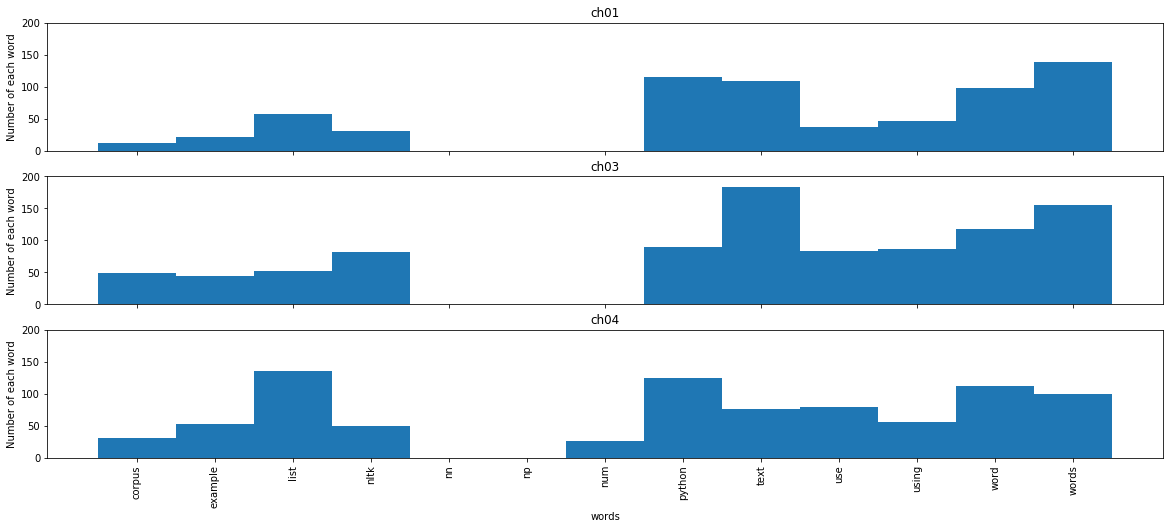

In [27]:
labels = []
for i in bigger_than_400_ex2:
    labels.append(vectorizer.get_feature_names()[i])

x = list(range(len(bigger_than_400_ex2)))
plt.subplots(figsize=(20,8))
plt.subplot(3,1,1, title="ch01", ylabel="Number of each word")
plt.xticks(visible=False)
plt.ylim(top=200)
plt.bar(x, vec1_3_4_9[0], width=1.0)
plt.subplot(3,1,2, title="ch03", ylabel="Number of each word")
plt.xticks(visible=False)
plt.ylim(top=200)
# plt.bar(x, vec1_3_4_9[1], width=1.0)
# plt.subplot(4,1,3, title="ch04", ylabel="Number of each word")
# plt.xticks(visible=False)
# plt.ylim(top=400)
plt.bar(x, vec1_3_4_9[1], width=1.0)
plt.subplot(3,1,3, xticklabels=labels, title="ch04", xlabel="words", ylabel="Number of each word")
plt.xticks(x, rotation=90)
plt.ylim(top=200)
plt.bar(x, vec1_3_4_9[2], width=1.0)

In [28]:
# Level 3

In [29]:
def create_co_matrix(corpus, vocab_size, window_size=1):
    """共起行列を作成。
    「ゼロから作るDeepLearning2 自然言語処理辺」p.72より。

    :param corpus(str): テキスト文。
    :param vocab_size: 語彙数。
    :param window_size: 共起判定の範囲。
    :return:
    """
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size+1):
            left_idx = idx - i
            right_idx = idx + i
            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1
            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1
    return co_matrix

In [30]:
def preprocess(text):
    """テキストに対する前処理。
    「ゼロから作るDeepLearning2 自然言語処理辺」p.66より。

    :param text:
    :return:
      courpus(list): id_to_wordのidに基づいたone-hot vector。
      word_to_id(dict): 単語をkeyとして、idを参照する辞書。
      id_to_word(dict): idをkeyとして、単語を参照する辞書。
    """
    text = text.lower()
    text = text.replace('.', ' .')
    text = text.replace('"', '')
    words = text.split(' ')

    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word
    corpus = np.array([word_to_id[w] for w in words])
    return corpus, word_to_id, id_to_word

In [31]:
def cosine_similarity(vectors):
    vectors = np.array(vectors)
    similarity = []
    for i in range(len(vectors)):
        temp = []
        for j in range(len(vectors)):
            temp.append(1 - distance.cosine(vectors[i], vectors[j]))
        similarity.append(temp)
    return similarity

def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    """コサイン類似度Top5を出力。

    :param query(str): クエリ。
    :param word_to_id(dict): 単語をkeyとして、idを参照する辞書。
    :param id_to_word(dict): idをkeyとして、単語を参照する辞書。
    :param word_matrix: 共起行列。
    :param top(int): 上位何件まで表示させるか。
    :return: なし。
    """
    if query not in word_to_id:
        print('%s is not found' % query)
        return

    print('[query] ' + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]

    vocab_size = len(word_to_id)
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)

    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(' %s: %s' % (id_to_word[i], similarity[i]))
        count += 1
        if count >= top:
            return

In [32]:
#''.join(docs).split('\n')

In [33]:
docs_text =' '.join(' '.join(docs).split('\n'))
#docs_text
#co_matrix_ex3 = create_co_matrix()

In [34]:
corpus, word_to_id, id_to_word = preprocess(docs_text)
vocab_size = len(word_to_id)
# print(corpus)
# print(word_to_id)
# print(id_to_word)

In [35]:
co_matrix = create_co_matrix(corpus, vocab_size, window_size=2)
df_ex3 = pd.DataFrame(co_matrix, index=word_to_id.keys(), columns=word_to_id.keys())
df_ex3

,preface,this,is,a,book,about,natural,language,processing,.,...,striving,fluency,unfortunate,concluded,"broadly,","expedient,","society,",pathway,present:,hacking!
preface,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
this,1,0,209,62,42,18,0,1,1,434,...,0,0,0,0,0,0,0,0,0,1
is,1,209,12,513,12,10,5,22,6,255,...,0,0,0,0,0,0,0,0,0,0
a,0,62,513,28,7,15,6,38,12,471,...,0,0,0,0,0,0,0,1,0,0
book,0,42,12,7,2,1,1,0,0,30,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"expedient,",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"society,",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pathway,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
present:,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [103]:
words = ["natural", "language", "text", "count", "word"]
vectors = df_ex3[words].T.values
cos_similarity_matrix = np.array(cosine_similarity(vectors))
cos_similarity_matrix

array([[1.        , 0.39780438, 0.32300359, 0.2266211 , 0.30911462],
       [0.39780438, 1.        , 0.68837464, 0.4709943 , 0.65282656],
       [0.32300359, 0.68837464, 1.        , 0.67026443, 0.90467466],
       [0.2266211 , 0.4709943 , 0.67026443, 1.        , 0.70410304],
       [0.30911462, 0.65282656, 0.90467466, 0.70410304, 1.        ]])

Text(0.5, 48.5, 'words')

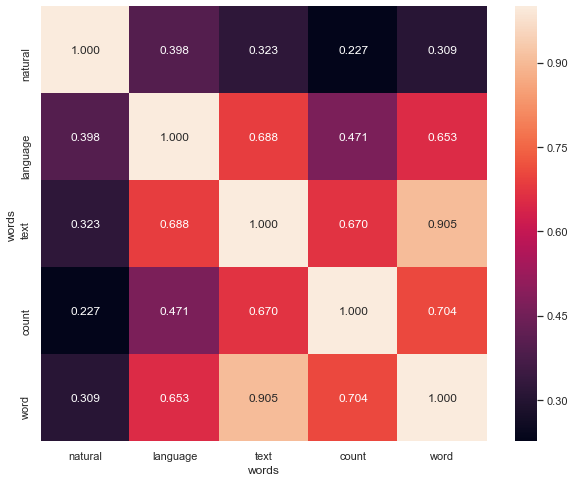

In [104]:
plt.subplots(figsize=(10,8))
sns.heatmap(cos_similarity_matrix, annot=True, fmt='.3f', xticklabels=words, yticklabels=words)
plt.ylabel("words")
plt.xlabel("words")

In [105]:
df_ex3[["text", "word"]].T

,preface,this,is,a,book,about,natural,language,processing,.,...,striving,fluency,unfortunate,concluded,"broadly,","expedient,","society,",pathway,present:,hacking!
text,0,8,26,138,0,1,1,1,6,102,...,0,0,0,0,0,0,0,0,0,0
word,0,13,57,121,0,3,0,0,2,75,...,0,0,0,0,0,0,0,0,0,0


In [106]:
degree = {}
target1 = "text"
target2 = "word"
for i in df_ex3.index:
    if df_ex3.loc[target1, i] > 0 and df_ex3.loc[target2, i] > 0:
        if i in degree:
            degree[i] = {target1: degree[i][target1] + df_ex3.loc[target1, i], target2: degree[i][target2] + df_ex3.loc[target2, i]}
        else:
            degree[i] = {target1: df_ex3.loc[target1, i], target2: df_ex3.loc[target2, i]}
        print(i)
        print(f"{target1}:{df_ex3.loc[target1, i]}, {target2}:{df_ex3.loc[target2, i]}")

this
text:8, word:13
is
text:26, word:57
a
text:138, word:121
about
text:1, word:3
processing
text:6, word:2
.
text:102, word:75
by
text:7, word:6
we
text:5, word:5
that
text:23, word:28
used
text:1, word:4
for
text:23, word:80
like
text:1, word:2
or
text:7, word:9
in
text:78, word:125
to
text:39, word:25
such
text:3, word:5
as
text:20, word:19
and
text:40, word:38
have
text:3, word:4
from
text:37, word:7
are
text:10, word:6
with
text:11, word:22
will
text:1, word:1
—
text:2, word:4
any
text:3, word:7
of
text:100, word:88
at
text:1, word:2
one
text:1, word:1
it
text:2, word:4
could
text:1, word:1
be
text:5, word:4
simple
text:2, word:2
word
text:2, word:2
different
text:2, word:1
the
text:126, word:194
other
text:2, word:4
on
text:11, word:9
example,
text:1, word:2

text:68, word:75
information
text:3, word:1
up
text:3, word:9
analysis
text:1, word:1
more
text:1, word:2
has
text:4, word:10
can
text:7, word:5
individual
text:1, word:1
containing
text:2, word:3
an
text:7, word:6
called
t

In [107]:
for i, j in degree.items():
    print(i, j)
    
descending = []
while len(degree) > 0:
    maxnum = 0
    for i, j in degree.items():
        if degree[i][target1] > maxnum:
            maxnum = degree[i][target1]
            maxidx = i
    tmp = [maxidx, degree[maxidx]]
    descending.append(tmp)
    degree.pop(maxidx)

this {'text': 8, 'word': 13}
is {'text': 26, 'word': 57}
a {'text': 138, 'word': 121}
about {'text': 1, 'word': 3}
processing {'text': 6, 'word': 2}
. {'text': 102, 'word': 75}
by {'text': 7, 'word': 6}
we {'text': 5, 'word': 5}
that {'text': 23, 'word': 28}
used {'text': 1, 'word': 4}
for {'text': 23, 'word': 80}
like {'text': 1, 'word': 2}
or {'text': 7, 'word': 9}
in {'text': 78, 'word': 125}
to {'text': 39, 'word': 25}
such {'text': 3, 'word': 5}
as {'text': 20, 'word': 19}
and {'text': 40, 'word': 38}
have {'text': 3, 'word': 4}
from {'text': 37, 'word': 7}
are {'text': 10, 'word': 6}
with {'text': 11, 'word': 22}
will {'text': 1, 'word': 1}
— {'text': 2, 'word': 4}
any {'text': 3, 'word': 7}
of {'text': 100, 'word': 88}
at {'text': 1, 'word': 2}
one {'text': 1, 'word': 1}
it {'text': 2, 'word': 4}
could {'text': 1, 'word': 1}
be {'text': 5, 'word': 4}
simple {'text': 2, 'word': 2}
word {'text': 2, 'word': 2}
different {'text': 2, 'word': 1}
the {'text': 126, 'word': 194}
other {'

In [108]:
for i in descending:
    print(i)

['a', {'text': 138, 'word': 121}]
['the', {'text': 126, 'word': 194}]
['.', {'text': 102, 'word': 75}]
['of', {'text': 100, 'word': 88}]
['in', {'text': 78, 'word': 125}]
['', {'text': 68, 'word': 75}]
['and', {'text': 40, 'word': 38}]
['to', {'text': 39, 'word': 25}]
['=', {'text': 38, 'word': 14}]
['from', {'text': 37, 'word': 7}]
['>>>', {'text': 31, 'word': 24}]
['is', {'text': 26, 'word': 57}]
['that', {'text': 23, 'word': 28}]
['for', {'text': 23, 'word': 80}]
['as', {'text': 20, 'word': 19}]
['\xa0', {'text': 20, 'word': 8}]
['using', {'text': 16, 'word': 7}]
['into', {'text': 16, 'word': 2}]
['some', {'text': 13, 'word': 6}]
['with', {'text': 11, 'word': 22}]
['on', {'text': 11, 'word': 9}]
['if', {'text': 11, 'word': 18}]
['are', {'text': 10, 'word': 6}]
['nltk', {'text': 9, 'word': 4}]
['w', {'text': 9, 'word': 5}]
['this', {'text': 8, 'word': 13}]
['by', {'text': 7, 'word': 6}]
['or', {'text': 7, 'word': 9}]
['can', {'text': 7, 'word': 5}]
['an', {'text': 7, 'word': 6}]
['pr

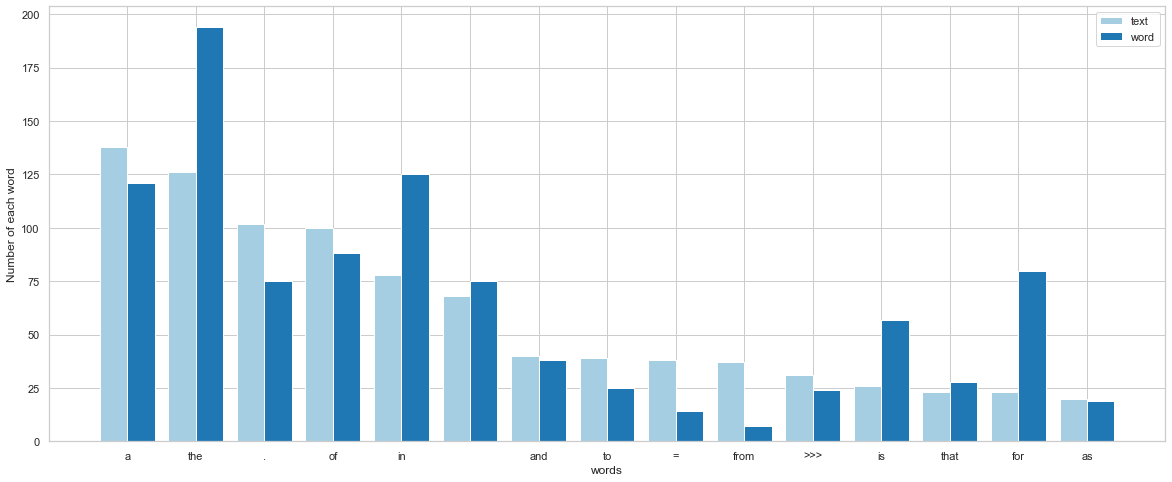

In [109]:
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Paired')

num_of_val = 15
x = np.array([i[0] for i in descending[:num_of_val]])
x_position = np.arange(len(x))

y_target1 = np.array([i[1][target1] for i in descending[:num_of_val]])
y_target2 = np.array([i[1][target2] for i in descending[:num_of_val]])

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1, 1, 1, xlabel="words", ylabel="Number of each word")
ax.bar(x_position, y_target1, width=0.4, label=target1)
ax.bar(x_position + 0.4, y_target2, width=0.4, label=target2)
ax.legend()
ax.set_xticks(x_position + 0.2)
ax.set_xticklabels(x)
plt.show()

In [110]:
words = ["natural", "language", "text", "count", "python"]
vectors = df_ex3[words].T.values
cos_similarity_matrix = np.array(cosine_similarity(vectors))
cos_similarity_matrix

array([[1.        , 0.39780438, 0.32300359, 0.2266211 , 0.35204964],
       [0.39780438, 1.        , 0.68837464, 0.4709943 , 0.66650237],
       [0.32300359, 0.68837464, 1.        , 0.67026443, 0.84239783],
       [0.2266211 , 0.4709943 , 0.67026443, 1.        , 0.68454972],
       [0.35204964, 0.66650237, 0.84239783, 0.68454972, 1.        ]])

Text(0.5, 48.453125, 'words')

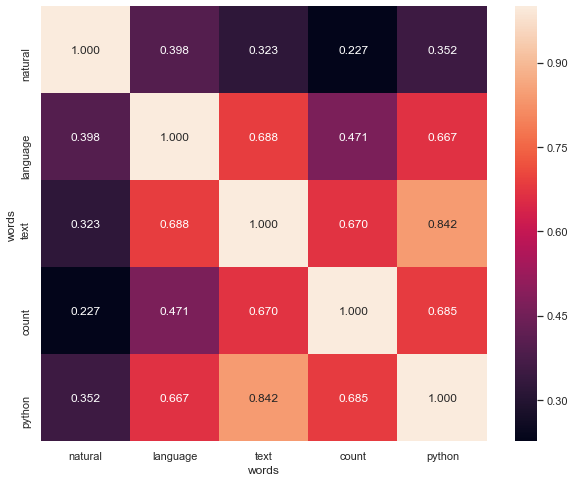

In [111]:
plt.subplots(figsize=(10,8))
sns.heatmap(cos_similarity_matrix, annot=True, fmt='.3f', xticklabels=words, yticklabels=words)
plt.ylabel("words")
plt.xlabel("words")

In [112]:
df_ex3[["text", "python"]].T

,preface,this,is,a,book,about,natural,language,processing,.,...,striving,fluency,unfortunate,concluded,"broadly,","expedient,","society,",pathway,present:,hacking!
text,0,8,26,138,0,1,1,1,6,102,...,0,0,0,0,0,0,0,0,0,0
python,0,9,22,37,1,3,0,8,4,60,...,0,0,0,0,0,0,0,0,0,0


In [113]:
degree = {}
target1 = "text"
target2 = "python"
for i in df_ex3.index:
    if df_ex3.loc[target1, i] > 0 and df_ex3.loc[target2, i] > 0:
        if i in degree:
            degree[i] = {target1: degree[i][target1] + df_ex3.loc[target1, i], target2: degree[i][target2] + df_ex3.loc[target2, i]}
        else:
            degree[i] = {target1: df_ex3.loc[target1, i], target2: df_ex3.loc[target2, i]}
        print(i)
        print(f"{target1}:{df_ex3.loc[target1, i]}, {target2}:{df_ex3.loc[target2, i]}")

this
text:8, python:9
is
text:26, python:22
a
text:138, python:37
about
text:1, python:3
language
text:1, python:8
processing
text:6, python:4
.
text:102, python:60
by
text:7, python:4
we
text:5, python:12
that
text:23, python:12
used
text:1, python:1
for
text:23, python:15
or
text:7, python:1
in
text:78, python:36
to
text:39, python:34
as
text:20, python:8
and
text:40, python:32
have
text:3, python:5
from
text:37, python:2
are
text:10, python:7
with
text:11, python:14
will
text:1, python:4
—
text:2, python:3
any
text:3, python:1
of
text:100, python:35
at
text:1, python:7
one
text:1, python:1
it
text:2, python:6
be
text:5, python:4
writing
text:1, python:3
the
text:126, python:80
other
text:2, python:4
on
text:11, python:2
support
text:1, python:1

text:68, python:21
access
text:2, python:1
up
text:3, python:1
more
text:1, python:1
has
text:4, python:4
provides
text:1, python:12
highly
text:1, python:1
can
text:7, python:4
python
text:2, python:10
an
text:7, python:3
source
text:6, pyt

In [114]:
for i, j in degree.items():
    print(i, j)
    
descending = []
while len(degree) > 0:
    maxnum = 0
    for i, j in degree.items():
        if degree[i][target1] > maxnum:
            maxnum = degree[i][target1]
            maxidx = i
    tmp = [maxidx, degree[maxidx]]
    descending.append(tmp)
    degree.pop(maxidx)

this {'text': 8, 'python': 9}
is {'text': 26, 'python': 22}
a {'text': 138, 'python': 37}
about {'text': 1, 'python': 3}
language {'text': 1, 'python': 8}
processing {'text': 6, 'python': 4}
. {'text': 102, 'python': 60}
by {'text': 7, 'python': 4}
we {'text': 5, 'python': 12}
that {'text': 23, 'python': 12}
used {'text': 1, 'python': 1}
for {'text': 23, 'python': 15}
or {'text': 7, 'python': 1}
in {'text': 78, 'python': 36}
to {'text': 39, 'python': 34}
as {'text': 20, 'python': 8}
and {'text': 40, 'python': 32}
have {'text': 3, 'python': 5}
from {'text': 37, 'python': 2}
are {'text': 10, 'python': 7}
with {'text': 11, 'python': 14}
will {'text': 1, 'python': 4}
— {'text': 2, 'python': 3}
any {'text': 3, 'python': 1}
of {'text': 100, 'python': 35}
at {'text': 1, 'python': 7}
one {'text': 1, 'python': 1}
it {'text': 2, 'python': 6}
be {'text': 5, 'python': 4}
writing {'text': 1, 'python': 3}
the {'text': 126, 'python': 80}
other {'text': 2, 'python': 4}
on {'text': 11, 'python': 2}
sup

In [115]:
for i in descending:
    print(i)

['a', {'text': 138, 'python': 37}]
['the', {'text': 126, 'python': 80}]
['.', {'text': 102, 'python': 60}]
['of', {'text': 100, 'python': 35}]
['in', {'text': 78, 'python': 36}]
['', {'text': 68, 'python': 21}]
['and', {'text': 40, 'python': 32}]
['to', {'text': 39, 'python': 34}]
['=', {'text': 38, 'python': 1}]
['from', {'text': 37, 'python': 2}]
['>>>', {'text': 31, 'python': 4}]
['is', {'text': 26, 'python': 22}]
['that', {'text': 23, 'python': 12}]
['for', {'text': 23, 'python': 15}]
['as', {'text': 20, 'python': 8}]
['\xa0', {'text': 20, 'python': 3}]
['using', {'text': 16, 'python': 23}]
['into', {'text': 16, 'python': 2}]
['some', {'text': 13, 'python': 4}]
['with', {'text': 11, 'python': 14}]
['on', {'text': 11, 'python': 2}]
['if', {'text': 11, 'python': 1}]
['are', {'text': 10, 'python': 7}]
['nltk', {'text': 9, 'python': 3}]
['this', {'text': 8, 'python': 9}]
['by', {'text': 7, 'python': 4}]
['or', {'text': 7, 'python': 1}]
['can', {'text': 7, 'python': 4}]
['an', {'text': 

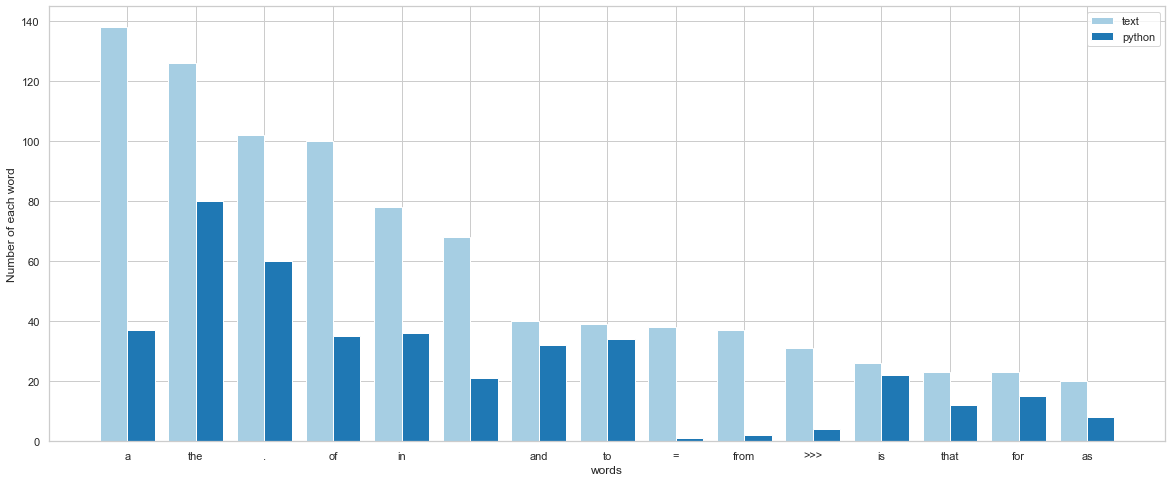

In [116]:
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Paired')

num_of_val = 15
x = np.array([i[0] for i in descending[:num_of_val]])
x_position = np.arange(len(x))

y_target1 = np.array([i[1][target1] for i in descending[:num_of_val]])
y_target2 = np.array([i[1][target2] for i in descending[:num_of_val]])

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1, 1, 1, xlabel="words", ylabel="Number of each word")
ax.bar(x_position, y_target1, width=0.4, label=target1)
ax.bar(x_position + 0.4, y_target2, width=0.4, label=target2)
ax.legend()
ax.set_xticks(x_position + 0.2)
ax.set_xticklabels(x)
plt.show()

In [117]:
for i in df_ex3.index:
    if df_ex3.loc["count", i] > 0 and df_ex3.loc["natural", i] > 0 and i not in stopwords:
        print(i)
        print(f"count:{df_ex3.loc['count', i]}, natural:{df_ex3.loc['natural', i]}")

.
count:2, natural:14
like
count:1, natural:1
could
count:2, natural:1
many
count:1, natural:2
>>>
count:1, natural:1
example
count:1, natural:1
